In [4]:
import os

os.environ["KERAS_BACKEND"] = "torch"

In [22]:
import tensorflow as tf

print("Version TF:", tf.__version__)
print("Dispositivos físicos:", tf.config.list_physical_devices())
print("Build:", tf.sysconfig.get_build_info())
print("GPUs disponibles:", tf.config.list_physical_devices('GPU'))
print(tf.test.gpu_device_name())



Version TF: 2.16.1
Dispositivos físicos: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Build: OrderedDict({'is_cuda_build': False, 'is_rocm_build': False, 'is_tensorrt_build': False})
GPUs disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
/device:GPU:0


2025-08-30 21:56:56.717732: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-30 21:56:56.717761: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

!unzip -q kagglecatsanddogs_5340.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0  43.0M      0  0:00:18  0:00:18 --:--:-- 38.1M      0  0:01:17  0:00:01  0:01:16 10.1M


In [11]:
DATASET_PATH = "/Users/juandiego/Documents/study/tensorflow/image_rating/PetImages"

def filter_images():
    deleted_imgs = 0
    for folder_name in ("Cat", "Dog"):
        folder_path = os.path.join(DATASET_PATH, folder_name)
        for image in os.listdir(folder_path):
            img_path = os.path.join(folder_path, image)
            try:
                fobj = open(img_path, "rb")
                is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
            finally:
                fobj.close()
            if not is_jfif:
                deleted_imgs += 1
                os.remove(img_path)
    print(f"Imagenes eliminadas: {deleted_imgs}")

In [12]:
filter_images()

Imagenes eliminadas: 1590


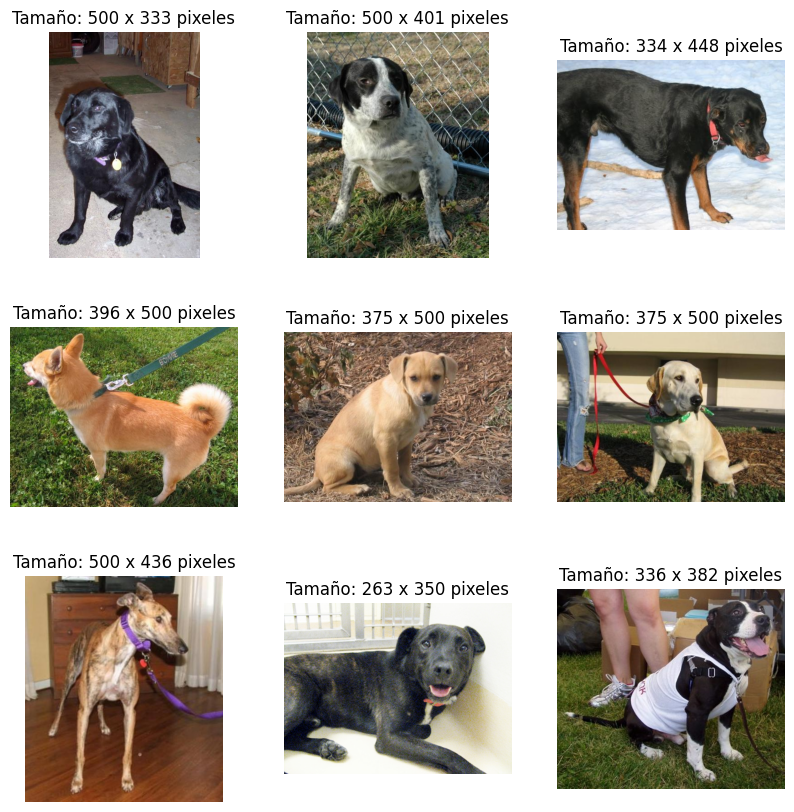

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(10, 10))
folder_path = os.path.join(DATASET_PATH, "Dog")
for i, image in enumerate(os.listdir(folder_path)[:9]):
    img_path = os.path.join(folder_path, image)
    img = mpimg.imread(img_path)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Tamaño: {img.shape[:2][0]} x {img.shape[:2][1]} pixeles")
    plt.axis("off")
    
plt.show()

In [29]:
from tensorflow import keras

image_size = (180, 180)
batch_size = 128

train_ds = keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.


2025-08-30 22:06:21.877426: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-30 22:06:21.877441: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


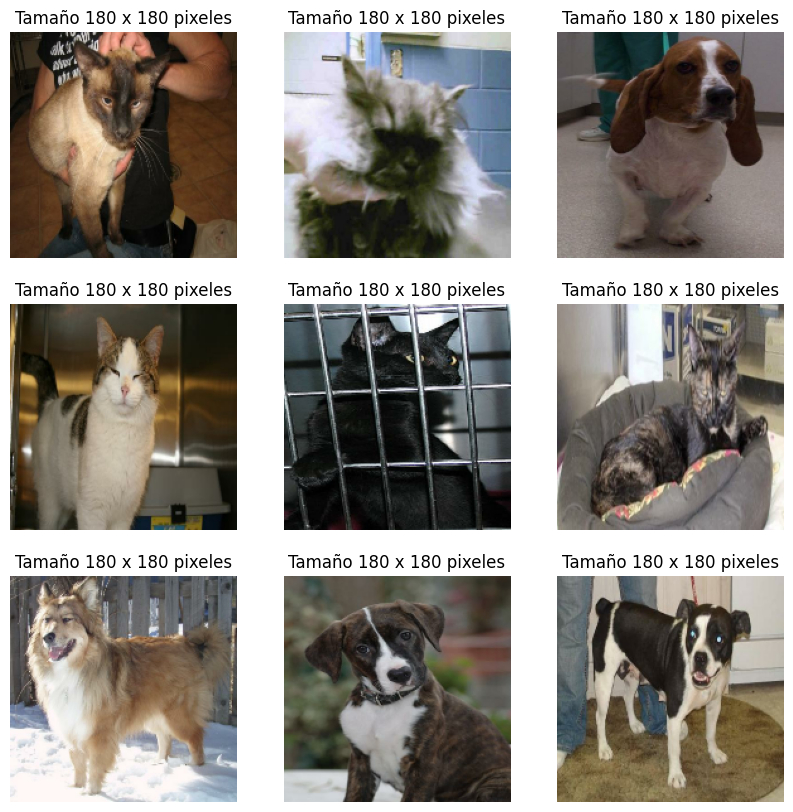

2025-08-30 22:10:58.898626: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [32]:
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Tamaño {images[i].shape[0]} x {images[i].shape[1]} pixeles")
        plt.axis("off")
        
    plt.show()

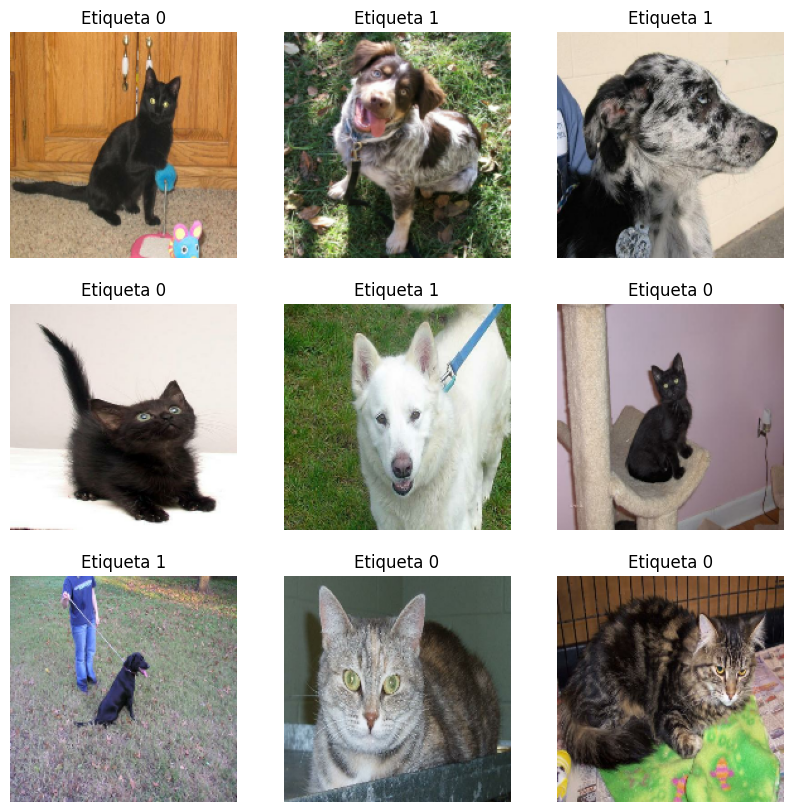

2025-08-30 22:16:55.959137: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [33]:
plt.figure(figsize=(10, 10))

for img, etiqueta in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(f"Etiqueta {etiqueta[i]}")
        plt.axis("off")
        
    plt.show()

